# Homework 3 - 95-791 Data Mining (Fall 2021) 
## Name: Yifan Zhou
#### Due: Sunday, December 5th, 2021


### Changing the author field and file name.

 (a) Change the `name:` field on the Rmd document from Your Name Here to your own name.

 (b) Rename this file to "Homework3_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
#from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from yellowbrick.datasets import load_nfl
from sklearn.datasets import fetch_california_housing
from statistics import mean
%matplotlib inline
plt.style.use('seaborn-white')



---

### Question 1 - RandomForests [ 22 pts]


**1)a) Read the `heart_failure_clinical_records_dataset`, convert any categorical variable to numerical and print the first 5 rows of the dataset.** [1 pts]

In [9]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(heart.info()) # the only categorical variable is sex
heart = pd.get_dummies(data = heart, drop_first=True)
heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB
None


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT,sex_M
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1,1


**1)b) Divide intro training and testing datasets, with a 20-70 ratio. Print out your y_test dataset.** [1 pts]

In [171]:
# split the x and y as predictors and target variables
X = heart[heart.columns.difference(['DEATH_EVENT'])]
y = heart['DEATH_EVENT']

# split training and test withing the larger training (year 2020 excluded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('The shape of X_train is{}. The shape of X_test is{}. The shape of y_train is{}. The shape of y_test is{}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
print(y_test)

The shape of X_train is(239, 12). The shape of X_test is(60, 12). The shape of y_train is(239,). The shape of y_test is(60,)
222    0
135    0
67     1
159    0
211    0
77     0
1      1
145    0
189    0
169    0
75     1
201    0
199    0
37     1
256    0
258    0
90     0
267    0
21     1
42     1
167    1
232    0
78     0
275    0
48     1
117    0
194    1
12     1
221    0
106    0
137    0
11     1
191    0
111    0
186    1
3      1
218    0
14     0
292    0
143    0
86     0
6      1
16     1
239    0
248    0
244    0
227    0
125    0
7      1
41     1
279    0
293    0
271    0
257    0
34     1
216    0
35     1
52     1
101    0
220    1
Name: DEATH_EVENT, dtype: int64


**1)c)Build a DecisionTreeClassifier with your datasets. Plot the generated tree. How good are your classification results?** [2 pts]

**Note: you may use any function we learned in Lab 3 to plot your DecisionTreeClassifier

In [176]:
# use a classifier for dummy variable target, control the max leaf nodes from overfitting
dt = DecisionTreeClassifier(max_leaf_nodes= 10)
dt.fit(X_train, y_train)

print('The test accuracy for this split is',dt.score(X_test, y_test) )
print('The average cross validation average accuracy is: ', mean(cross_val_score(dt, X_train, y_train, scoring= 'accuracy', cv = 10 )))
print('The average cross validation average roc_auc is: ', mean(cross_val_score(dt, X_train, y_train, scoring= 'roc_auc', cv = 10 )))

The test accuracy for this split is 0.85
The average cross validation average accuracy is:  0.8197463768115942
The average cross validation average roc_auc is:  0.8025702468487395


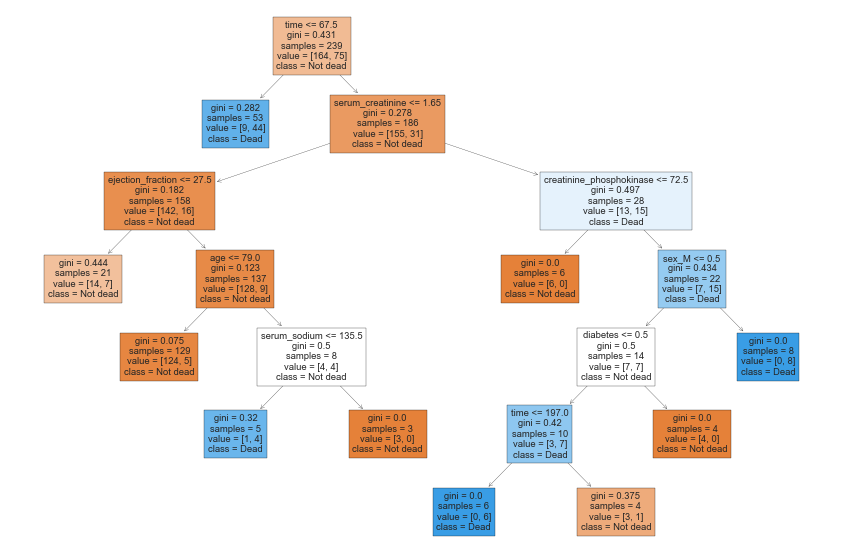

In [177]:
plt.figure(figsize = (15,10))
plot_tree = tree.plot_tree(dt, feature_names=X.columns.tolist(), filled =True, class_names = ['Not dead', 'Dead'])

--> The cross-validation accuracy is 0.81.

**1)d) Repeat the process the process from 1)c) but this time using a RandomForestClassifier. How good are your results?** [4 pts]

In [178]:
rfr = RandomForestClassifier(max_depth=30, random_state=1 )
rfr.fit(X_train, y_train)
print('The test accuracy for this split is', rfr.score(X_test, y_test))
print('The average cross validation average accuracy is: ', mean(cross_val_score(rfr, X_train, y_train, scoring= 'accuracy', cv = 10 )))
print('The average cross validation average roc_auc is: ', mean(cross_val_score(rfr, X_train, y_train, scoring= 'roc_auc', cv = 10 )))

The test accuracy for this split is 0.9
The average cross validation average accuracy is:  0.8371376811594202
The average cross validation average roc_auc is:  0.9022452731092437


--> The performance is better.

**1)e) Repeat the process the process from 1)d) but this time tune the number of trees (n_estimators) in your RF. You can use CV to tune your RF. Plot your number of trees against your CV score. What is your best number of trees?** [6 pts]
**Hint: try a minimum of 20 trees, all the way to 500 trees.

In [179]:
# calculate accucary for different number of trees to find the best num
num_of_trees = np.arange(20, 501, 30)
cv_errors = []
for num in num_of_trees:
    cv_errors.append(mean(cross_val_score(RandomForestClassifier(n_estimators = num, random_state=1 ), X_train, y_train, scoring= 'accuracy', cv = 10 )))

(array([6], dtype=int64),)
The best number of trees is 200 .
The best mean cv accuracy is 0.8496376811594203 .


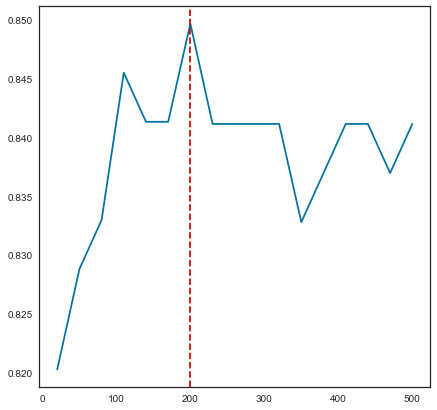

In [180]:
# plot
max_accuracy = np.max(cv_errors)
print(np.where(cv_errors == np.max(cv_errors)))
index_maxr = np.where(cv_errors == np.max(cv_errors))[0]
print('The best number of trees is', int(num_of_trees[int(index_maxr)]),'.')
print('The best mean cv accuracy is', cv_errors[int(index_maxr)],'.')
plt.figure(figsize=(7,7))
plt.plot(num_of_trees, cv_errors)
plt.axvline(x=num_of_trees[index_maxr], color='r', linestyle='--')

--> The best number of trees is 200.

**1)f) Random Forest have a few parameters we can tune. We could tune each one separately through CV, or we could use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to try all our parameters at one. This is called hyperparameter tuning. Read the documentation to run GridSearchCV on at least 3 different parameter from your RandomForest. Once you've obtained the best parameters, re-train your RandomForest with them and report your results. Did this results improve compared to 1)e)?** [6 pts]

In [182]:
# Search for the best parameters
parameters = {'n_estimators': np.arange(20, 501, 30), 'max_leaf_nodes':np.arange(10, 20, 1), 'bootstrap' : (True, False)}
rfr = RandomForestClassifier()
clf = GridSearchCV(rfr, parameters, scoring='accuracy', cv = 10)
clf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': (True, False),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([ 20,  50,  80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380,
       410, 440, 470, 500])},
             scoring='accuracy')

In [184]:
print('The best params are:', clf.best_params_)

The best params are: {'bootstrap': True, 'max_leaf_nodes': 17, 'n_estimators': 230}


In [185]:
rf_best = RandomForestClassifier(bootstrap = True, max_leaf_nodes = 17, n_estimators = 230 )
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.923     0.923     0.923        39
           1      0.857     0.857     0.857        21

    accuracy                          0.900        60
   macro avg      0.890     0.890     0.890        60
weighted avg      0.900     0.900     0.900        60



--> The performance has improved.

**1)g) For 1)f) plot the variable importance. What is your most important variable? Describe the differences between variables.** [2 pts]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'anaemia'),
  Text(2, 0, 'creatinine_phosphokinase'),
  Text(3, 0, 'diabetes'),
  Text(4, 0, 'ejection_fraction'),
  Text(5, 0, 'high_blood_pressure'),
  Text(6, 0, 'platelets'),
  Text(7, 0, 'serum_creatinine'),
  Text(8, 0, 'serum_sodium'),
  Text(9, 0, 'sex_M'),
  Text(10, 0, 'smoking'),
  Text(11, 0, 'time')])

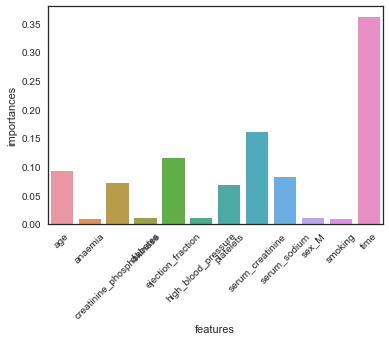

In [187]:
#create dataframe
importance_result = pd.DataFrame({'features' : X.columns.tolist(), 'importances' : rf_best.feature_importances_})
importance_result
#create plot
sns.barplot(x = 'features', y = 'importances', data = importance_result)
plt.xticks(rotation=45)

--> The most important is time. 

---


### Question 2 - Unsupervised Learning - Clustering [ 16 pts]



**2)a) For this question we will work with the NFL dataset from [yellowbrick](https://www.scikit-yb.org/en/latest/api/datasets/nfl.html). Load the dataset, split it into X and y. We will only need X for this question. Print out X and print out the information for the dataset to make sure there are no categorical variables.** [ 2 pts]


In [2]:
X, y = load_nfl()
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        494 non-null    int64  
 1   G          494 non-null    int64  
 2   GS         494 non-null    int64  
 3   Tgt        494 non-null    int64  
 4   Rec        494 non-null    int64  
 5   Ctch_Rate  494 non-null    float64
 6   Yds        494 non-null    int64  
 7   Y/R        494 non-null    float64
 8   TD         494 non-null    int64  
 9   Lng        494 non-null    int64  
 10  Y/Tgt      494 non-null    float64
 11  R/G        494 non-null    float64
 12  Y/G        494 non-null    float64
 13  Fmb        494 non-null    int64  
 14  C_pos      494 non-null    int64  
 15  CB_pos     494 non-null    int64  
 16  DT_pos     494 non-null    int64  
 17  FB_pos     494 non-null    int64  
 18  QB_pos     494 non-null    int64  
 19  RB_pos     494 non-null    int64  
 20  T_pos     

,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,Y/R,TD,Lng,...,Fmb,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,25,16,16,147,125,0.850,1405,11.2,9,72,...,2,0,0,0,0,0,0,0,0,1
1,28,16,16,156,116,0.744,1163,10.0,8,34,...,1,0,0,0,0,0,0,0,1,0
2,26,16,16,163,115,0.706,1572,13.7,11,49,...,2,0,0,0,0,0,0,0,0,1
3,29,16,16,170,113,0.665,1677,14.8,8,58,...,2,0,0,0,0,0,0,0,0,1
4,28,16,16,153,113,0.739,1373,12.2,9,68,...,1,0,0,0,0,0,0,0,0,1


In [3]:
print('Number of unique values for each variable')
for i in X.columns.tolist():
    print(i,":",  len(X[i].unique()))
# drop C_pos CB_pos DT_pos FB_pos QB_pos RB_pos T_pos TE_pos WR_pos

Number of unique values for each variable
Age : 20
G : 16
GS : 17
Tgt : 117
Rec : 86
Ctch_Rate : 203
Yds : 319
Y/R : 164
TD : 15
Lng : 89
Y/Tgt : 127
R/G : 65
Y/G : 305
Fmb : 11
C_pos : 2
CB_pos : 2
DT_pos : 2
FB_pos : 2
QB_pos : 2
RB_pos : 2
T_pos : 2
TE_pos : 2
WR_pos : 2


In [4]:
# drop C_pos CB_pos DT_pos FB_pos QB_pos RB_pos T_pos TE_pos WR_pos
X.drop(X.filter(regex='.*pos').columns, axis = 1, inplace= True)
X.head() # no more categorical variables

,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,Y/R,TD,Lng,Y/Tgt,R/G,Y/G,Fmb
0,25,16,16,147,125,0.850,1405,11.2,9,72,9.6,7.8,87.8,2
1,28,16,16,156,116,0.744,1163,10.0,8,34,7.5,7.3,72.7,1
2,26,16,16,163,115,0.706,1572,13.7,11,49,9.6,7.2,98.3,2
3,29,16,16,170,113,0.665,1677,14.8,8,58,9.9,7.1,104.8,2
4,28,16,16,153,113,0.739,1373,12.2,9,68,9.0,7.1,85.8,1


**2)b) Fit a k-means model with the data from 2)a). For us to fit this model we must first determine an optimal k. Use a an elbow graph to plot a comprehensive range of k's and fit your model to the chosen k.** [ 4 pts]


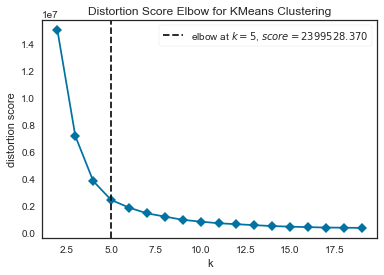

In [40]:
# create a kmeans model object
model = KMeans(random_state=1)

#run an elbow plot from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(X)
visualizer.show(); 

In [46]:
# fit a kmeans model using k = 5
model_tuned = KMeans(random_state=1, n_clusters=5).fit(X)

**2)c) Repeat 2)a) using the Calinski-Harabasz metric. Did your k change or remain the same?** [ 4 pts]

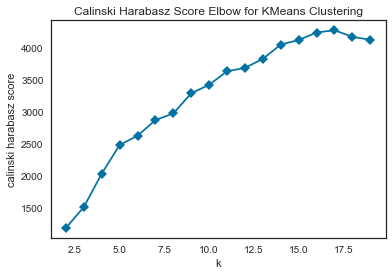

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [56]:
# Using Calinski-Harabasz metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz',locate_elbow=False, timings=False)
visualizer.fit(X)
visualizer.show()

In [50]:
# fit a kmeans model using k = 17
model_tuned_2 = KMeans(random_state=1, n_clusters=17).fit(X)

--> The best k derived by the Calinski-Harabasz metric is 17.

**2)d) Examine your results from 2)a) and 2)c). How good are the clusters formed by each? What makes sense and what doesn't make sense?** [ 4 pts]

C:\Users\hp\anaconda3\envs\spyder\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


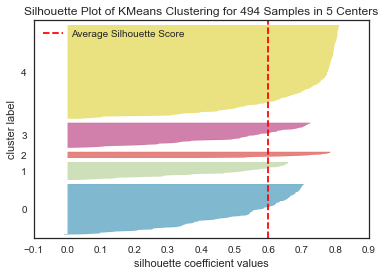

C:\Users\hp\anaconda3\envs\spyder\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


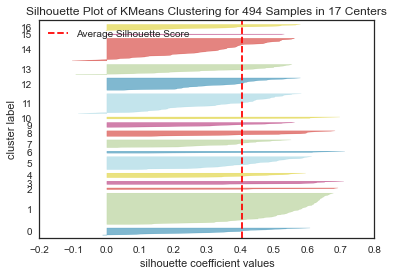

In [51]:
visualizer = SilhouetteVisualizer(model_tuned, colors='yellowbrick')
visualizer.fit(X) 
visualizer.show();
visualizer = SilhouetteVisualizer(model_tuned_2, colors='yellowbrick')
visualizer.fit(X) 
visualizer.show();  

--> 

C:\Users\hp\anaconda3\envs\spyder\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


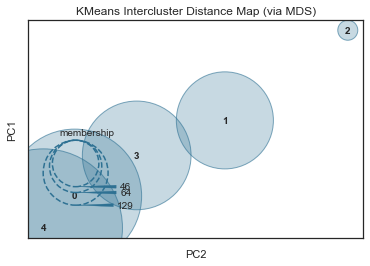

C:\Users\hp\anaconda3\envs\spyder\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


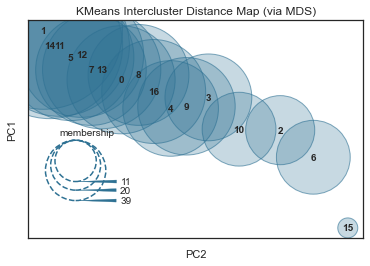

In [52]:
visualizer = InterclusterDistance(model_tuned)
visualizer.fit(X) 
visualizer.show();  
visualizer = InterclusterDistance(model_tuned_2)
visualizer.fit(X) 
visualizer.show();  

**2)e) Go to yellowbrick [Feature Analysis Visualizers](https://www.scikit-yb.org/en/latest/api/features/index.html) and read through the categories. Creates a correlation plot with yellowbrick. Pick an additional plot and use it on your features. What did you learn from both plots?**[4pts]

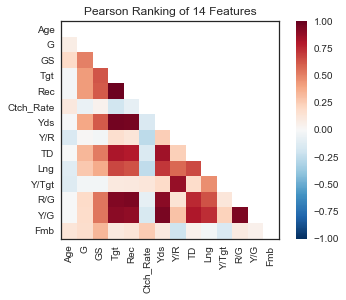

<AxesSubplot:title={'center':'Pearson Ranking of 14 Features'}>

In [53]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D


# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

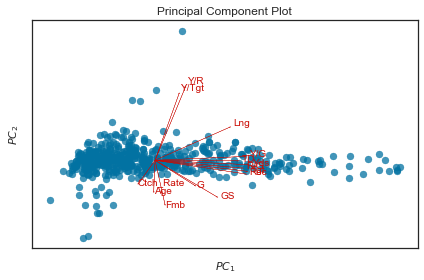

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [54]:
# PCA
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA


visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X)
visualizer.show()

--> Certain variables are closely related such as (Y/G, R/G, TD). They jointly do not contribute to much of the variance of X, and can be classified to one component (in this case is one aspect of the person's health). Other clusted variables can be classified as another aspect of the person's health.

---

### Question 3 - Market Basket Analysis [ 12 pts]


**3)a) Begin by loading and cleaning the bread basket dataset.** [2 pts]

In [2]:
bread = pd.read_csv('bread basket.csv')
bread.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


**3)b) From the dataset extract the transactions, and print out a single random transaction.** [ 2 pts]

In [3]:
import random
transactions = bread.groupby("Transaction")['Item'].apply(list).reset_index(name='items')
transactions.head()
print(transactions.iloc[random.randint(0, 50)])

Transaction                                     12
items          [Jam, Coffee, Tartine, Pastry, Tea]
Name: 11, dtype: object


**3)c) Use the Transaction encoder on your transactions dataset. Print out your encoded transactions** [2 pts]

In [4]:
te = TransactionEncoder()
te_ary = te.fit(transactions['items']).transform(transactions['items'])
te_data = pd.DataFrame(te_ary, columns=te.columns_)
te_data.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**3)d) Use the apriori algorithm and generate association rules to extract the most frequent itemsets.** [ 2 pts]

In [5]:
frequent_itemsets = apriori(te_data,min_support=0.011, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
24,0.142631,(Tea)
4,0.103856,(Cake)
30,0.090016,"(Coffee, Bread)"
18,0.086107,(Pastry)
19,0.071844,(Sandwich)
15,0.061807,(Medialuna)
11,0.058320,(Hot chocolate)
38,0.054728,"(Coffee, Cake)"


--> Coffee is the most frequent item.

**3)e) Play around with the generating association rules according to different thresholds. Comment on the levels of support, lift, and confidence of this dataset. What are the levels of your most popular itemsets? What are good thresholds?** [ 4 pts]

In [14]:
# Using support 
association_results = association_rules(frequent_itemsets, metric='support', min_threshold= 0.04)
association_results = association_results.sort_values(by = ['support'] , ascending = False)
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
6,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142
7,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014
4,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
5,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682


In [16]:
# Using confidence 
association_results = association_rules(frequent_itemsets, metric='confidence', min_threshold= 0.5)
association_results = association_results.sort_values(by = ['confidence'] , ascending = False)
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


In [20]:
# Using lift 
association_results = association_rules(frequent_itemsets, metric='lift', min_threshold= 1.4)
association_results = association_results.sort_values(by = ['lift'] , ascending = False)
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
1,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
3,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
2,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
4,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
5,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
8,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
9,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
6,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134
7,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712


-->  
Support: The top 3 frequent item combinations are (coffee, bread), (coffee, cake), and (tea, coffee). They come in reversed pairs.  
Confidence: The top 3 frequent associations from antecedent to consequent are (toast -> coffee), (Medialuna -> coffee), and (Pastry -> coffee). It's simply because coffee are too prevalent in orders (support of coffee = 0.47, nearly half!)
Lift: The top 3 'more often' associations are (Hot chocolate -> cake), (cake -> hot chocolate), and (tea - cake). They also come in reversed pairs. Lift provide most insights suggesting that there is strong association compared to independence after controling the prevalence of one item. 


---

### REFERENCES
List any references (even if these are previous homeworks, office hours, class exercises, websites, etc) you used to complete your homework. Even if they are one of the books assigned for this class. If this section is incomplete you will be deducted 50% of your final grade from this homework.

[1] https://towardsdatascience.com/association-rules-2-aa9a77241654
[2] https://www.scikit-yb.org/en/latest/api/features/index.html
[3] https://towardsdatascience.com/complete-guide-to-association-rules-2-2-c92072b56c84
[4] this week's lab 
[5] last week's in-class exercise


**Note: if there are no comments to explain your code you will receive 0 in this homework**

### Total Score:  --/50

### END OF HOMEWORK 3